<a href="https://colab.research.google.com/github/Martin-Msb/context-aware-recommendation/blob/main/context_aware_recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This research notebook is part of DAMI II course at DSV - HT2022

### Authors: © 2022 Martin Masaba & Edda Waciira

## Structure of Notebook

1. Background
2. Overview of Recommendation systems
3. Explicit vs Implicit Feedback
4. Data Processing
5. Training, validation & Testing

**1. Background**


**2. Overview of Recommendation systems**

**2.1 Clasical Recommendation Systems** 

**2.2 Context-Aware Recommendations**


**3. Explicit vs implicit feedback**

Since no explicit feedback from customers e.g ratings, as seen in most recommender applications,  we can only rely on implicit customer feedback instead.

In our case, we have no explicit indication that a customer liked or disliked the articles they purchased from H&M! Buying an article doesn't mean it was liked!

Implicit feedback is explained in an ineresting paper by [Hu et al. (2008)](https://www.google.ca/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&cad=rja&uact=8&ved=0ahUKEwi899eAu6baAhUurlkKHaVvB6UQFggsMAA&url=http%3A%2F%2Fyifanhu.net%2FPUB%2Fcf.pdf&usg=AOvVaw3WIcPGTpxR8m7C32F8whFx) 

A user-item interactions are recorded $r_{u,i}$ denoting the level of user interaction $u$ with a particular item $i$. For example, if a customer of ID $1$ purchased an article of ID $4$ once, we set $r_{1,4}=1$. We can also set $r_{u,i}$ to hold information about how many times an article was purchased by a customer. 

Given the set of observations $r_{u,i}$, a binary indicator $p_{u,i}$ is introduced where:

$$ p_{u,i} = \begin{cases} 1 & \mbox{if } r_{i,j}>0 \\
0 & \mbox{otherwise.} \end{cases} $$


A confidence parameter $\alpha$ lets the user determine how much importance they wish to place on the recorded $r_{u,i}$. This leads to the introduction of $c_{u,i}$ which we take to be the confidence we have in the strength of user $u$'s reaction to product $i$: 
$c_{u,i} = 1 + \alpha r_{u,i}$.

**ALS**

Let $N_u$ denote the number of users, and $N_p$ denote the number of products. Let $k\in \mathbb{R}^+$ be a user defined number of factors.

Now, in implicit feedback, the goal is to find matrices $X\in \mathbb{R}^{N_u \times k}$ and $Y\in \mathbb{R}^{N_p \times k}$ such that the following cost function is minimised:

$$\sum_{u,i} c_{u,i}(p_{u,i}-X_u^T Y_i)^2 + \lambda (\sum_u \| X_u\|^2 + \sum_{i} \| y_u\|^2), $$

where
$X_u$ is the $u$th row of X, 
$Y_i$ is the $i$th row of Y,
$\lambda$ term is a user defined parameter which prevents overfitting. 

With this minimisation at hand, we are able to recover estimates of $c_{u,i}$, and thus of $r_{u,i}$ for interactions which have not yet occured.

Add the articles bought by a certain customer as an implicit feedback signal!

### Dowload H&M dataset from Kaggle

Install Kaggle library

In [1]:
!pip install kaggle

     |████████████████████████████████| 58 kB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 78 kB 1.9 MB/s eta 0:00:01
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73052 sha256=17294f5708dfbbf71d196a8ae02cd99a9d6f7c89c57ca95d926c42a2ebfa880b
  Stored in directory: /home/marmas6/.cache/pip/wheels/29/da/11/144cc25aebdaeb4931b231e25fd34b394e6a5725cbb2f50106
Successfully built kaggle


In [6]:
!cp kaggle.json ~/.kaggle/kaggle.json

In [7]:
!chmod 600 ~/.kaggle/kaggle.json

Download dataset

In [8]:
!kaggle competitions download -c h-and-m-personalized-fashion-recommendations

100%|█████████████████████████████████████▉| 28.7G/28.7G [08:24<00:00, 63.3MB/s]
100%|██████████████████████████████████████| 28.7G/28.7G [08:24<00:00, 61.1MB/s]


Unzip data into working dir

In [ ]:
!unzip h-and-m-personalized-fashion-recommendations

In [2]:
#Install these in env
!pip install pandas

  Using cached pandas-1.5.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.2 MB)
  Using cached numpy-1.24.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Using cached pytz-2022.7-py2.py3-none-any.whl (499 kB)


In [3]:
!pip install numpy

In [4]:
!pip install seaborn

     |████████████████████████████████| 293 kB 1.6 MB/s eta 0:00:01
  Using cached matplotlib-3.6.2-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (9.4 MB)
  Using cached contourpy-1.0.6-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (295 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached fonttools-4.38.0-py3-none-any.whl (965 kB)
  Using cached kiwisolver-1.4.4-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.2 MB)
     |████████████████████████████████| 3.4 MB 31.3 MB/s eta 0:00:0101


In [237]:
!pip3 install -U scikit-learn

In [6]:
!python -m pip install -U matplotlib

In [1]:
!pip install implicit

  Using cached implicit-0.6.2-cp38-cp38-manylinux2014_x86_64.whl (18.6 MB)


In [142]:
#Import libraries
import numpy as np 
import pandas as pd

import random

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import os
from PIL import Image
import glob
import warnings
warnings.filterwarnings('ignore')

#No normal distribution in age column
import scipy.sparse as sparse
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import implicit
from sklearn import metrics

### Data Preprocesing
**Customers Data**

In [3]:
customers_df = pd.read_csv('customers.csv')

In [5]:
customers_df.shape

(1371980, 7)

In [6]:
customers_df.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [7]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [8]:
customers_df.isnull().sum()

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16009
age                        15861
postal_code                    0
dtype: int64

In [9]:
member_status = pd.DataFrame(customers_df['club_member_status'].value_counts()/customers_df['club_member_status'].shape[0] * 100)
member_status

,club_member_status
ACTIVE,92.748509
PRE-CREATE,6.775609
LEFT CLUB,0.034038


'pre-create' and 'left-club' seems to be very small groups, so we can drop the rows

In [10]:
customers_df.drop(customers_df.index[customers_df['club_member_status'] != 'ACTIVE'], inplace=True)

customers_df.club_member_status.value_counts()

ACTIVE    1272491
Name: club_member_status, dtype: int64

In [11]:
customers_df.fashion_news_frequency.value_counts()

NONE         788482
Regularly    471304
Monthly         778
None              2
Name: fashion_news_frequency, dtype: int64

In [12]:
customers_df['fashion_news_frequency'].replace('None', np.nan, inplace=True)

In [13]:
customers_df.fashion_news_frequency.value_counts()

NONE         788482
Regularly    471304
Monthly         778
Name: fashion_news_frequency, dtype: int64

In [14]:
customers_df.fashion_news_frequency.unique()

array(['NONE', 'Regularly', nan, 'Monthly'], dtype=object)

In [15]:
customers_df = customers_df.dropna(subset =['fashion_news_frequency'])

In [16]:
customers_df.fashion_news_frequency.unique()

array(['NONE', 'Regularly', 'Monthly'], dtype=object)

In [17]:
customers_df.isnull().sum()

customer_id                    0
FN                        789740
Active                    802113
club_member_status             0
fashion_news_frequency         0
age                         6168
postal_code                    0
dtype: int64

In [18]:
avg_age = customers_df.age.mean()
max_age = customers_df.age.max()
min_age = customers_df.age.min()

print('The average age is {}, the max age is {} and the min age is {}'
      .format(avg_age, max_age, min_age))

The average age is 36.067268231084924, the max age is 99.0 and the min age is 16.0


<AxesSubplot:title={'center':'Customers Ages'}, ylabel='Age Bins'>

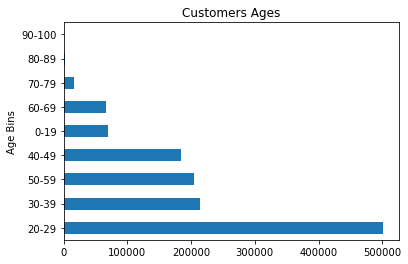

In [19]:
bins = 0, 19, 29, 39, 49, 59, 69, 79,89,100
customers_df['age_bins'] = pd.cut(customers_df.age, bins, labels = ['0-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-100'])


customers_df.age_bins.value_counts().plot(kind = 'barh', title = 'Customers Ages', xlabel = 'Age Bins', ylabel= 'Count')

In [20]:
#Should drop some ages here
age_bins = pd.DataFrame(customers_df['age_bins'].value_counts()/customers_df['age_bins'].shape[0] * 100)
age_bins

,age_bins
20-29,39.701991
30-39,16.920045
50-59,16.194259
40-49,14.584027
0-19,5.516975
60-69,5.223059
70-79,1.264117
80-89,0.099797
90-100,0.006426


In [21]:
customers_df = customers_df.drop(customers_df[(customers_df['age'] >= 50) | (customers_df['age'] <= 20)].index)

In [22]:
customers_df.age_bins.value_counts()

20-29     447303
30-39     213288
40-49     183841
90-100         0
80-89          0
70-79          0
60-69          0
50-59          0
0-19           0
Name: age_bins, dtype: int64

In [23]:
#drop unnecessary columns
customers_df.drop(['age_bins', 'postal_code'], axis = 1, inplace =True)
customers_df

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0
7,00007d2de826758b65a93dd24ce629ed66842531df6699...,1.0,1.0,ACTIVE,Regularly,32.0
10,0000945f66de1a11d9447609b8b41b1bc987ba185a5496...,NaN,NaN,ACTIVE,NONE,29.0
...,...,...,...,...,...,...
1371973,ffffa28cd7ab5d1cbbbfe7b582b1c419270cc0539f3dae...,1.0,1.0,ACTIVE,Regularly,22.0
1371974,ffffaff3905b803d1c7e153a1378a5151e1f34f236ba54...,1.0,1.0,ACTIVE,Regularly,21.0
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,NaN,NaN,ACTIVE,NONE,24.0
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,NaN,NaN,ACTIVE,NONE,21.0


In [24]:
customers_df.isnull().sum()

customer_id                    0
FN                        547750
Active                    556125
club_member_status             0
fashion_news_frequency         0
age                         6168
dtype: int64

According to the owner of the dataset, 'FN' is if a customer get Fashion News newsletter, 'Active' is if the customer is active for communication.
See more [here](https://www.kaggle.com/c/h-and-m-personalized-fashion-recommendations/discussion/307001)

As such, the value 1.0 in these two columns can be interpreted as 'true' and as such, np.nan can be intepreted as 'false'.

Therefore, these values can be replaced with 0

In [25]:
customers_df['FN'] = customers_df['FN'].fillna(0)
customers_df['Active'] = customers_df['Active'].fillna(0)

In [26]:
customers_df.FN.value_counts()

0.0    547750
1.0    302850
Name: FN, dtype: int64

In [27]:
customers_df.Active.value_counts()

0.0    556125
1.0    294475
Name: Active, dtype: int64

In [28]:
customers_df.isnull().sum()

customer_id                  0
FN                           0
Active                       0
club_member_status           0
fashion_news_frequency       0
age                       6168
dtype: int64

Only the 'age' has nan values now and since they are not many, it is possible to drop these rows

In [29]:
customers_df = customers_df.dropna(subset =['age'])

In [30]:
customers_df.isnull().sum()

customer_id               0
FN                        0
Active                    0
club_member_status        0
fashion_news_frequency    0
age                       0
dtype: int64

**Scaling numeric columns**

There are three numerical columns (FN, Active & age). But FN and Active have 1 and 0 values representing truth or false.

As such, only age should be scaled. Below we check the dristribution of age so as to decide the best sclaing method to use.

In [31]:
customers_df['age'].describe()

count    844432.000000
mean         31.333135
std           8.536422
min          21.000000
25%          24.000000
50%          29.000000
75%          37.000000
max          49.000000
Name: age, dtype: float64

<AxesSubplot:xlabel='age', ylabel='Count'>

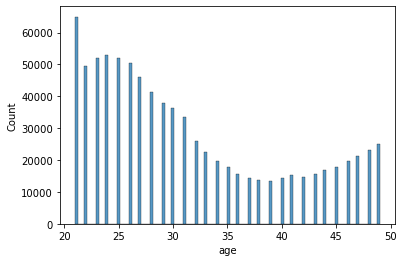

In [32]:
sns.histplot(customers_df['age'])

<AxesSubplot:ylabel='Density'>

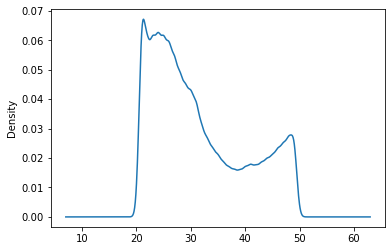

In [33]:
customers_df['age'].plot(kind='kde')

In [34]:
scaler = MinMaxScaler()

In [35]:
age_col = customers_df[['age']]

age_col.shape

(844432, 1)

In [36]:
scaler.fit(age_col)
age_scaled = scaler.transform(age_col)

In [37]:
age_scaled.shape

(844432, 1)

In [38]:
customers_df = customers_df.assign(age_scaled=age_scaled)

In [39]:
customers_df

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,age_scaled
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,ACTIVE,NONE,49.0,1.000000
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,0.0,ACTIVE,NONE,25.0,0.142857
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,0.0,ACTIVE,NONE,24.0,0.107143
7,00007d2de826758b65a93dd24ce629ed66842531df6699...,1.0,1.0,ACTIVE,Regularly,32.0,0.392857
10,0000945f66de1a11d9447609b8b41b1bc987ba185a5496...,0.0,0.0,ACTIVE,NONE,29.0,0.285714
...,...,...,...,...,...,...,...
1371973,ffffa28cd7ab5d1cbbbfe7b582b1c419270cc0539f3dae...,1.0,1.0,ACTIVE,Regularly,22.0,0.035714
1371974,ffffaff3905b803d1c7e153a1378a5151e1f34f236ba54...,1.0,1.0,ACTIVE,Regularly,21.0,0.000000
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0.0,0.0,ACTIVE,NONE,24.0,0.107143
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,0.0,0.0,ACTIVE,NONE,21.0,0.000000


In [40]:
categorical_cols = ['club_member_status', 'fashion_news_frequency']

In [41]:
categorical_cols

['club_member_status', 'fashion_news_frequency']

**Enconding Categorical Columns**

In [42]:
customers_df[categorical_cols].nunique()

club_member_status        1
fashion_news_frequency    3
dtype: int64

In [43]:
encoder = OneHotEncoder(sparse = False, handle_unknown = 'ignore')

In [44]:
encoder.fit(customers_df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [45]:
#Note: Used anoterh version of scikit-learn. get_feature_names instead() of get_feature_names_out()
encoded_cols = list(encoder.get_feature_names(categorical_cols))
print(encoded_cols)

['club_member_status_ACTIVE', 'fashion_news_frequency_Monthly', 'fashion_news_frequency_NONE', 'fashion_news_frequency_Regularly']


In [46]:
customers_df[encoded_cols] = encoder.transform(customers_df[categorical_cols])

In [47]:
customers_df

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,age_scaled,club_member_status_ACTIVE,fashion_news_frequency_Monthly,fashion_news_frequency_NONE,fashion_news_frequency_Regularly
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,ACTIVE,NONE,49.0,1.000000,1.0,0.0,1.0,0.0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,0.0,ACTIVE,NONE,25.0,0.142857,1.0,0.0,1.0,0.0
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,0.0,ACTIVE,NONE,24.0,0.107143,1.0,0.0,1.0,0.0
7,00007d2de826758b65a93dd24ce629ed66842531df6699...,1.0,1.0,ACTIVE,Regularly,32.0,0.392857,1.0,0.0,0.0,1.0
10,0000945f66de1a11d9447609b8b41b1bc987ba185a5496...,0.0,0.0,ACTIVE,NONE,29.0,0.285714,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1371973,ffffa28cd7ab5d1cbbbfe7b582b1c419270cc0539f3dae...,1.0,1.0,ACTIVE,Regularly,22.0,0.035714,1.0,0.0,0.0,1.0
1371974,ffffaff3905b803d1c7e153a1378a5151e1f34f236ba54...,1.0,1.0,ACTIVE,Regularly,21.0,0.000000,1.0,0.0,0.0,1.0
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0.0,0.0,ACTIVE,NONE,24.0,0.107143,1.0,0.0,1.0,0.0
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,0.0,0.0,ACTIVE,NONE,21.0,0.000000,1.0,0.0,1.0,0.0


In [48]:
customers_num_df = customers_df[['FN', 'Active','age_scaled','fashion_news_frequency_Monthly','fashion_news_frequency_NONE','fashion_news_frequency_Regularly']]

In [49]:
customers_num_df.corr()

,FN,Active,age_scaled,fashion_news_frequency_Monthly,fashion_news_frequency_NONE,fashion_news_frequency_Regularly
FN,1.000000,0.978589,0.018760,0.032688,-0.994511,0.993181
Active,0.978589,1.000000,0.020216,0.031154,-0.974137,0.972880
age_scaled,0.018760,0.020216,1.000000,0.004650,-0.018578,0.018341
fashion_news_frequency_Monthly,0.032688,0.031154,0.004650,1.000000,-0.033770,-0.018852
fashion_news_frequency_NONE,-0.994511,-0.974137,-0.018578,-0.033770,1.000000,-0.998615
fashion_news_frequency_Regularly,0.993181,0.972880,0.018341,-0.018852,-0.998615,1.000000


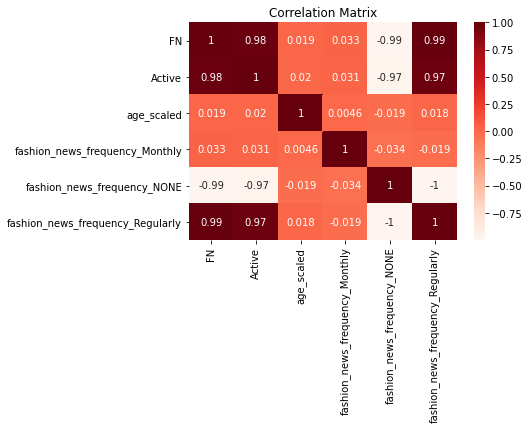

In [50]:
sns.heatmap(customers_num_df.corr(), cmap ='Reds', annot = True)
plt.title('Correlation Matrix');

**Articles Data**

In [51]:
articles_df = pd.read_csv('articles.csv')

In [52]:
articles_df.shape

(105542, 25)

In [53]:
articles_df.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [54]:
articles_df.shape

(105542, 25)

In [55]:
articles_df.isnull().sum()

article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64

In [56]:
articles_df = articles_df.dropna()

<AxesSubplot:>

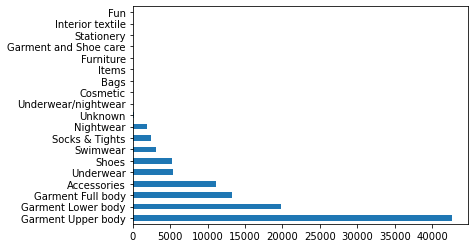

In [57]:
articles_df.product_group_name.value_counts().plot(kind = 'barh')

<AxesSubplot:>

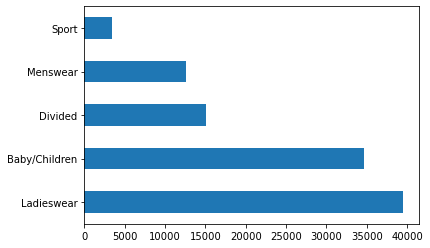

In [58]:
articles_df.index_group_name.value_counts().plot(kind = 'barh')

**Transactions Data**

In [59]:
transactions_df = pd.read_csv('transactions_train.csv', parse_dates=["t_dat"])

In [60]:
transactions_df.dtypes

t_dat               datetime64[ns]
customer_id                 object
article_id                   int64
price                      float64
sales_channel_id             int64
dtype: object

In [61]:
transactions_df.shape

(31788324, 5)

In [62]:
transactions_df.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [63]:
transactions_df['t_dat'].max()

Timestamp('2020-09-22 00:00:00')

A total of 31,788,324 transactions made by 1,371,980 customers as seen from the cutomers_df. The first transaction was on 20/09/2018 and the last transaction was on 20/09/2020

In [64]:
#number of unique values
transactions_df['customer_id'].nunique()

1362281

<AxesSubplot:>

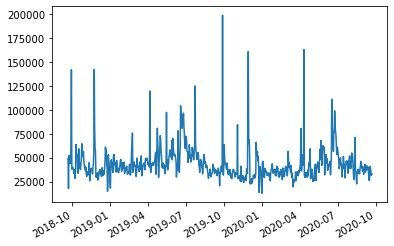

In [65]:
transactions_df['t_dat'].value_counts().plot()

**Merge the dataframes**

In [66]:
%%time
merged_df = transactions_df.merge(articles_df, on='article_id')
final_df = merged_df.merge(customers_df, on='customer_id')

CPU times: user 2min 16s, sys: 26.3 s, total: 2min 42s
Wall time: 2min 42s


In [67]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22974093 entries, 0 to 22974092
Data columns (total 39 columns):
 #   Column                            Dtype         
---  ------                            -----         
 0   t_dat                             datetime64[ns]
 1   customer_id                       object        
 2   article_id                        int64         
 3   price                             float64       
 4   sales_channel_id                  int64         
 5   product_code                      int64         
 6   prod_name                         object        
 7   product_type_no                   int64         
 8   product_type_name                 object        
 9   product_group_name                object        
 10  graphical_appearance_no           int64         
 11  graphical_appearance_name         object        
 12  colour_group_code                 int64         
 13  colour_group_name                 object        
 14  perceived_colour

In [69]:
#convert string customer IDs to numeric type, article IDs already ints
final_df['customerID'] = final_df['customer_id'].astype('category').cat.codes

Split dataframe into training and testing. Since the last day of transactions is 22/09/2020, the training data will be upto 15/09/2020, 7 days before the last transaction was made.

In [70]:
#trans_dates = final_df['t_dat']
#train_data = final_df[(trans_dates >= '2018-09-20 00:00:00') & (trans_dates < '2020-09-15 00:00:00')]
#test_data = final_df[(trans_dates >= '2020-09-15 00:00:00')]

The next 7 days of transactions have been preserved for predictions

In [ ]:
#Content-based filtering
#Recommend products based on what users have liked in the past i.e. User-Product and product-product
#Product attributes are necessary for content based filtering and not for collaborative filtering
#Attributes like t-shirt, black, nike, has graphic etc

**A look at the images**

In [68]:
os.getcwd()

'/home/marmas6/context-aware-recommendation'

In [69]:
images_root = r'/home/marmas6/context-aware-recommendation/images'

In [71]:
#Returns dir, sub-dirs & image file paths
root_dirs = []
sub_dirs = []
image_files = []

for roots, sub_dir, files in os.walk(images_root):
  for file in files:
    if file.endswith(".jpg"):
      root_dirs.append(roots)
      sub_dirs.append(os.path.join(roots, file))
      image_files.append(file)

In [189]:
#Extract some images here

**Option 1: Deal directly with implicit feedback to build a recommendation system, consider context attributes**

In [140]:
#Number of each article bought by a particular customer
n_purchases_each = pd.DataFrame(final_df.groupby(['t_dat','customerID','article_id', 'age', 'detail_desc']).size(), columns= ['purchases'])

In [141]:
n_purchases_each

purchases
t_dat      customerID article_id age  detail_desc                                                  
2018-09-20 2          541518023  24.0 Lace push-up bras with underwired, moulded, pad...          1
                      663713001  24.0 Lace push-up body with underwired, moulded, pad...          1
           3          505221001  32.0 Jumper in rib-knit cotton with hard-worn detail...          1
                      505221004  32.0 Jumper in rib-knit cotton with hard-worn detail...          1
                      685687001  32.0 V-neck knitted jumper with long sleeves and rib...          1
...                                                                                             ...
2020-09-22 837971     910949002  30.0 Sports bra in fast-drying functional fabric wit...          1
           838335     891322004  32.0 Short shirt dress in a cotton weave with a coll...          1
                      929511001  32.0 Short shirt dress in soft imitation leather wit...          1
           838368     833459002  21.0 Thin metal rings in various designs.                        1
           838497     898573003  29.0 Blouse in a textured weave with covered buttons...          1

[20626257 rows x 1 columns]

In [143]:
#Total number of articles purchased by each customers
data = n_purchases_each.reset_index(level=['t_dat','customerID','article_id', 'age', 'detail_desc']).sort_values(by=['purchases', 'customerID'], ascending=False)

In [144]:
data

,t_dat,customerID,article_id,age,detail_desc,purchases
770763,2018-10-14,681101,678342001,27.0,Fitted T-shirt in soft cotton jersey with a sl...,570
4068504,2019-02-16,485434,629420001,23.0,T-shirt in soft cotton jersey.,199
5680530,2019-04-15,771944,685347001,36.0,Fitted top in soft cotton jersey with a boat n...,130
11091378,2019-09-28,303554,688558002,26.0,"Fitted, long-sleeved top in soft ribbed jersey.",121
11610612,2019-10-16,4282,756322001,27.0,"Short satin nightslip with lace at the top, a ...",120
...,...,...,...,...,...,...
15256470,2020-03-21,0,841260003,49.0,T-shirt in soft jersey with a round neckline w...,1
15256471,2020-03-21,0,859416011,49.0,Short-sleeved top in soft jersey made from a c...,1
15256472,2020-03-21,0,887593002,49.0,Top in jersey crêpe. Round neckline with an op...,1
15256473,2020-03-21,0,890498002,49.0,Fitted jacket in washed cotton denim with a co...,1


Young customers tend to buy most items. The number of purchases decreases with age!

The dataset is quite huge and with computational constraints, we decide to take a portion. Selection can be based on the age, date ....

**Implicit feedback using Alternating Least Squares (ALS)**

In [145]:
unique_customers = data.customerID.unique()
customer_ids = dict(zip(unique_customers, np.arange(unique_customers.shape[0], dtype=np.int32)))

unique_articles = data.article_id.unique()
article_ids = dict(zip(unique_articles, np.arange(unique_articles.shape[0], dtype=np.int32)))

data['customerID'] = data.customerID.apply(lambda i: customer_ids[i])
data['article_id'] = data.article_id.apply(lambda i: article_ids[i])

In [147]:
data.shape

(20626257, 6)

Get Compressed Sparse Row (CSR) matrices

In [148]:
customer_articles = sparse.csr_matrix((data['purchases'].astype(float),(data['customerID'], data['article_id'])))
article_customers = sparse.csr_matrix((data['purchases'].astype(float),(data['article_id'], data['customerID'])))

In [149]:
customer_articles

<838511x102733 sparse matrix of type '<class 'numpy.float64'>'
	with 19716726 stored elements in Compressed Sparse Row format>

In [150]:
article_customers

<102733x838511 sparse matrix of type '<class 'numpy.float64'>'
	with 19716726 stored elements in Compressed Sparse Row format>

In [176]:
# initialize a model
model = implicit.als.AlternatingLeastSquares(factors=5, regularization=0.01, iterations=5)

# train the model on a sparse matrix of article/customer/confidence weights
model.fit(customer_articles.T)

article_factors, customer_factors = model.item_factors, model.user_factors

  0%|          | 0/5 [00:00<?, ?it/s]

Get recommendations for customerID 500

In [180]:
customer_id = 500
recommended_articles = model.recommend(customer_id, article_customers[customer_id])
recommended_articles

(array([20084, 34038,  5894, 56640, 33775,  8126, 18236, 19588,   792,
        13203], dtype=int32),
 array([0.02718049, 0.01880633, 0.01779946, 0.01768539, 0.01721367,
        0.01684189, 0.01680581, 0.01633747, 0.01630263, 0.01615013],
       dtype=float32))

Our model does not perform well predicting for this customerID with low confidence scores

In [183]:
customer_id = 0
recommended_articles = model.recommend(customer_id, article_customers[customer_id])
recommended_articles

(array([     1,   8818,    122,  29376,     30,     79,     81,   7542,
        283307,  72958], dtype=int32),
 array([0.5082135 , 0.36033565, 0.34067142, 0.3237659 , 0.29030645,
        0.25494093, 0.24263726, 0.23308323, 0.22839938, 0.22277768],
       dtype=float32))

Our model fairly predicts well for customerID 0, it predicts the first article with over 50% confidence!

Given article_id 17768, find similar items

In [153]:
data.loc[data['article_id'] == 17768]

,t_dat,customerID,article_id,age,detail_desc,purchases
15183508,2020-03-16,28159,17768,34.0,"Blouse in a crêpe weave with a deep V-neck, lo...",4
14842438,2020-03-02,7501,17768,31.0,"Blouse in a crêpe weave with a deep V-neck, lo...",4
16825895,2020-05-20,115534,17768,24.0,"Blouse in a crêpe weave with a deep V-neck, lo...",2
14536466,2020-02-17,129823,17768,23.0,"Blouse in a crêpe weave with a deep V-neck, lo...",2
15895328,2020-04-11,132800,17768,31.0,"Blouse in a crêpe weave with a deep V-neck, lo...",2
...,...,...,...,...,...,...
15001162,2020-03-08,381508,17768,30.0,"Blouse in a crêpe weave with a deep V-neck, lo...",1
16274958,2020-04-28,834529,17768,25.0,"Blouse in a crêpe weave with a deep V-neck, lo...",1
14915329,2020-03-05,836744,17768,21.0,"Blouse in a crêpe weave with a deep V-neck, lo...",1
17758047,2020-06-18,13729,17768,26.0,"Blouse in a crêpe weave with a deep V-neck, lo...",1


In [154]:
article_id = 17768
n_similar = 10

article_vecs = model.item_factors
customer_vecs = model.user_factors

article_norms = np.sqrt((article_vecs * article_vecs ).sum(axis=1))

scores = article_vecs.dot(article_vecs[article_id]) / article_norms
top_idx = np.argpartition(scores, -n_similar)[-n_similar:]
similar = sorted(zip(top_idx, scores[top_idx] / article_norms[article_id]), key=lambda x: -x[1])

In [155]:
for article in similar:
    idx, score = article
    print(data.detail_desc.loc[data.article_id == idx])

15183508    Blouse in a crêpe weave with a deep V-neck, lo...
14842438    Blouse in a crêpe weave with a deep V-neck, lo...
16825895    Blouse in a crêpe weave with a deep V-neck, lo...
14536466    Blouse in a crêpe weave with a deep V-neck, lo...
15895328    Blouse in a crêpe weave with a deep V-neck, lo...
                                  ...                        
15001162    Blouse in a crêpe weave with a deep V-neck, lo...
16274958    Blouse in a crêpe weave with a deep V-neck, lo...
14915329    Blouse in a crêpe weave with a deep V-neck, lo...
17758047    Blouse in a crêpe weave with a deep V-neck, lo...
16028421    Blouse in a crêpe weave with a deep V-neck, lo...
Name: detail_desc, Length: 234, dtype: object
Series([], Name: detail_desc, dtype: object)
Series([], Name: detail_desc, dtype: object)
Series([], Name: detail_desc, dtype: object)
Series([], Name: detail_desc, dtype: object)
Series([], Name: detail_desc, dtype: object)
Series([], Name: detail_desc, dtype: object)
Se

**Implicit feedback using Bayesian Personalized Ranking (BPR)**

In [188]:
# initialize a model
bpr = implicit.bpr.BayesianPersonalizedRanking(factors=50, iterations=50, regularization=0.01)

# train the model on a sparse matrix of article/customer/confidence weights
bpr.fit(customer_articles.T)

article_factors, customer_factors = bpr.item_factors, bpr.user_factors

  0%|          | 0/50 [00:00<?, ?it/s]

Bayesian Personalised Ranking achieves a training accuracy of 90.29% with 50 epochs!

In [189]:
customer_id = 0
recommended_articles = bpr.recommend(customer_id, article_customers[customer_id])
recommended_articles

(array([131144, 480853, 193230, 347691, 539481, 348194, 801961, 345752,
        168388, 234995], dtype=int32),
 array([4.233846 , 3.9915493, 3.958223 , 3.9557722, 3.8941379, 3.7727766,
        3.7715278, 3.7378783, 3.7225566, 3.6798975], dtype=float32))

In [190]:
customer_id = 500
recommended_articles = bpr.recommend(customer_id, article_customers[customer_id])
recommended_articles

(array([372124,  25409, 212722, 531022, 521570,  30419, 629628, 332496,
        825247,  85577], dtype=int32),
 array([4.6243777, 4.397331 , 4.394763 , 4.3265243, 4.3102055, 4.296238 ,
        4.28364  , 4.238801 , 4.2132196, 4.2090263], dtype=float32))

The model predicts articles given a customerID with relatively high confidence scores

In [191]:
#Returns similar items to userID 100 based on BPR
article_id = 100
n_similar = 10
similar = bpr.similar_items(article_id, n_similar)
similar

(array([   100, 394874, 449506, 556808, 470838, 596057, 250040, 446276,
        427299, 635339], dtype=int32),
 array([0.99999994, 0.9541817 , 0.9427096 , 0.9410395 , 0.93612385,
        0.9345238 , 0.9332154 , 0.9323955 , 0.9293456 , 0.92928976],
       dtype=float32))

**Implicit feedback using Logistic Matrix Factorization**

In [194]:
# initialize a model
lmf = implicit.lmf.LogisticMatrixFactorization(factors=100, iterations=50, regularization=0.01)

# train the model on a sparse matrix of article/customer/confidence weights
lmf.fit(customer_articles.T)

article_factors, customer_factors = lmf.item_factors, lmf.user_factors

  0%|          | 0/50 [00:00<?, ?it/s]

In [199]:
customer_id = 0
recommended_articles = lmf.recommend(customer_id, article_customers[customer_id])
(recommended_articles)

(array([ 36368,   1922, 142740,  76862,   7060,  22384,  33190,  39949,
          3962,  65162], dtype=int32),
 array([26.197227, 21.94689 , 18.707075, 18.198324, 17.569492, 17.557877,
        17.497692, 17.32854 , 17.274982, 17.259333], dtype=float32))

In [200]:
customer_id = 500
recommended_articles = lmf.recommend(customer_id, article_customers[customer_id])
print(recommended_articles)

(array([  4672,   8945,  57753,   2110,  20337,  30870,   3962,  71207,
       365391,  60271], dtype=int32), array([19.581959, 19.566414, 17.56305 , 17.498678, 16.2914  , 16.16067 ,
       15.9284  , 15.470739, 15.094362, 14.810348], dtype=float32))


In [196]:
#Returns similar articles to userID 100
article_id = 100
n_similar = 10
similar = lmf.similar_items(article_id, n_similar)
print(similar)

(array([   100, 426841, 589580, 398949, 333788, 342088, 478959, 259586,
       497936, 720160], dtype=int32), array([1.        , 0.8955689 , 0.89527255, 0.8937617 , 0.8914265 ,
       0.89083296, 0.89077604, 0.8906111 , 0.89047456, 0.8902783 ],
      dtype=float32))


Logistic Matrix Factorization outperforms BPR and ALS in confidently recommending articles to a customer as well as retrieving similar items!

**Option 2: Recommendation System using Explicit data, consider contextual attributes**

Manipulate the data to provide a scoring/rating to customer-article interactions

Build models based on this!

In [ ]:
#We can generate a rating by the number of times a customer bought an item and use 
#it to build a recommendation system
train, validation, test = np.split(data.sample(frac=1), [int(.6*len(data)), int(.8*len(data))])train, validation, test = np.split(data.sample(frac=1), [int(.6*len(data)), int(.8*len(data))])